**Bayes Theorem:**

$$P(B|A) = \frac{P(B|A)*P(A)}{P(B)}$$ <br>

Let's say machine 1 produces 30 wrenches/hr and machine 2 produces 20 wrenches/hr. Out of all wrenches, 1% are defective. 50% of defective are from machine 1, 50% are from machine 2. 

$$P(part M2 defective) = ? $$

We know...<br>
1. $$P(M1) = \frac{30}{50} = 0.6$$ <br><br>

2. $$P(M2) = \frac{20}{50} = 0.4$$ <br><br>

3. $$P(defect) = 0.01$$ <br><br>

4. $$P(M1|defect) = 50%$$ <br><br>

5. $$P(M2|defect) = 50%$$ <br><br>

Following Bayes Theorem...
$$P(defect|M2) = \frac{P(M2|defect)*P(defect)}{P(M2)} = 0.0125$$
$$P(defect|M2) = \frac{50%*1%}{40%} = 0.0125$$

**Naive Bayes:**<br>
Example of classification: <br>
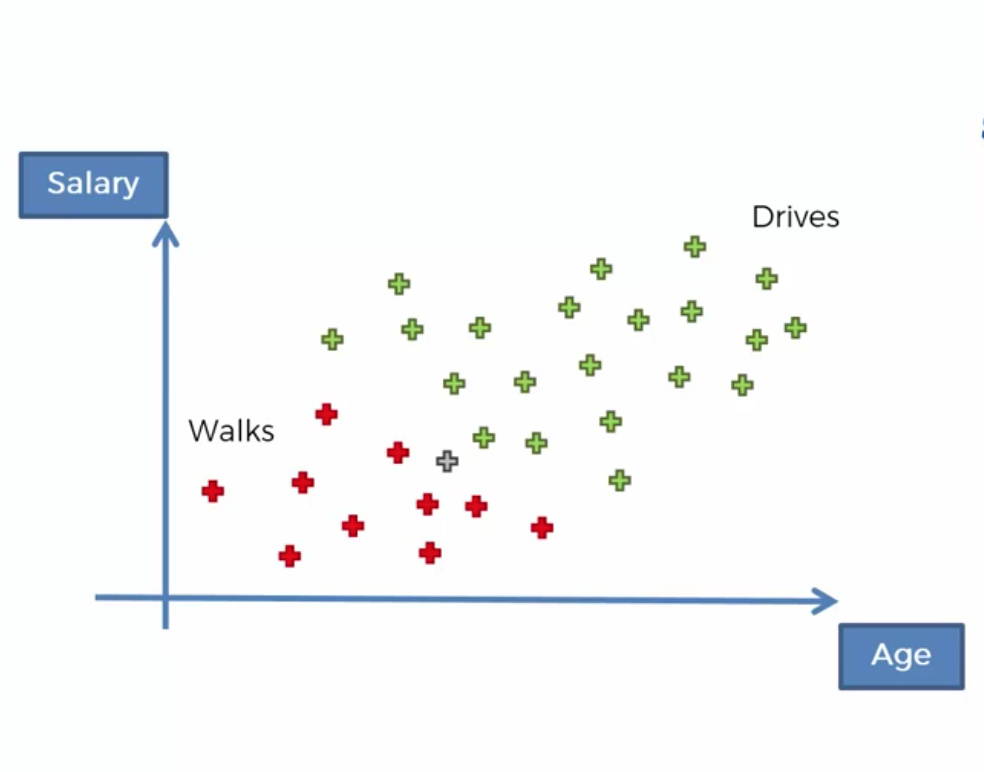

**Key idea:** Compare P(Walks|X) vs. P(Drives|X) and choose one with highest probability.

$$P(Walks|X) = \frac{P(X|Walks)*P(Walks)}{P(X)}$$ <br>
where...<br>
Posterior proability:<br>
$$P(Walks|X)$$ 
Marginal likelihood: <br>
$$P(X) = \frac{Number of similar obs}{total obs}$$


Prior probability:<br>
$$P(Walks) = \frac{# walkers}{total obs}$$
Likelihood:<br>
$$P(X|Walks) = \frac{# walkers in similar X circle}{#Walkers}$$<br>

Similar observations are those in circle of chosen radius:
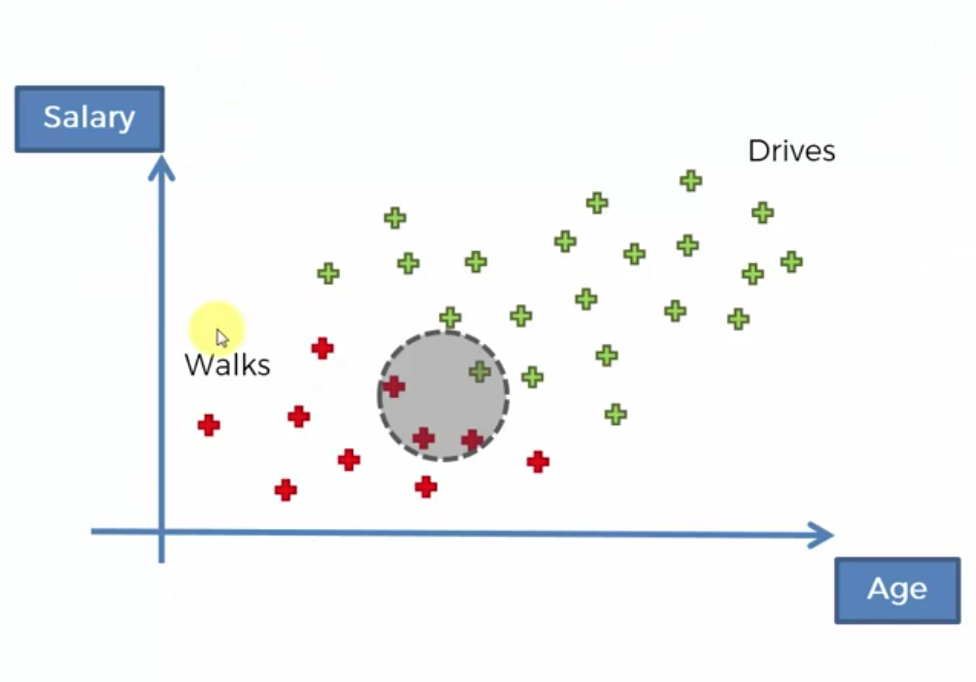

If P(Walks|X) = 0.75 and P(Drives|X) = 0.25, then classify X as Walk.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('Naive_Bayes/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = dataset.iloc[:, [2, 3]].values #choose only age and salary
y = dataset.iloc[:, 4].values #purchased

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/Nicha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [14]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

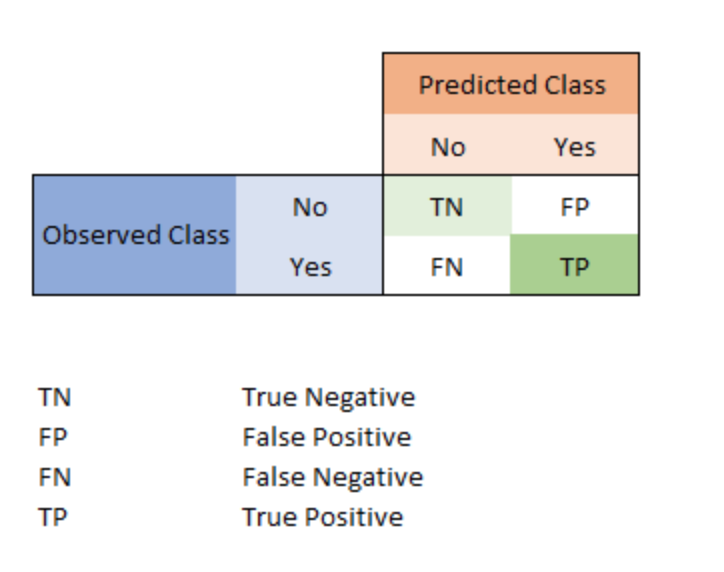

Confusion matrix:<br>
- 65 correct predictions of not-purchased (0)
- 25 correct predictions of purchased (1)
- 3 incorrect predictions of purchased (predict 1 but 0)
- 7 incorrect predictions of not-purchased (predict 0 but 1)

In [17]:
cm

array([[65,  3],
       [ 7, 25]])

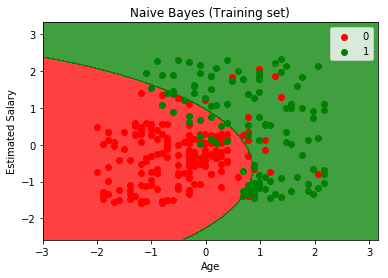

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

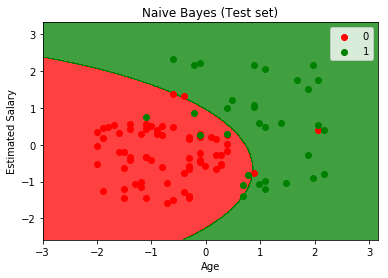

In [19]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [23]:
#train accuracy
classifier.score(X_train, y_train)

0.8833333333333333

In [22]:
#test accuracy
classifier.score(X_test, y_test)

0.90000000000000002